<a href="https://colab.research.google.com/github/mcatrinque/area_cep_mg/blob/main/projeto_dados_abertos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Representação Geométrica das Áreas de CEP do Estado de Minas Gerais

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
path = 'drive/My Drive/Colab Notebooks/cep_mg/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj


In [3]:
# project GeoPandas dataframe
mg_area_cep = gpd.read_file(path + 'shapefiles/br_mg_poligonos_ceps/br_mg_poligonos_ceps.shp')
mg_area_cep.drop(['layer','path', 'cidade', 'geocodigo'], axis=1, inplace=True)
mg_area_cep.to_crs(pyproj.CRS.from_epsg(4674), inplace=True)
mg_area_cep.head()

,id,postcode,area,perimeter,geometry
0,0,35730-000,0.000974,0.115736,"POLYGON ((-44.13340 -19.56552, -44.14410 -19.5..."
1,1,37993-000,0.015807,0.496334,"POLYGON ((-47.00789 -20.74097, -47.00796 -20.7..."
2,2,38360-000,0.011398,0.399614,"POLYGON ((-49.57950 -18.75477, -49.58172 -18.7..."
3,3,35123-000,0.013677,0.436712,"POLYGON ((-41.87004 -19.11203, -41.87622 -19.1..."
4,4,39680-000,0.058659,0.871373,"POLYGON ((-42.48353 -17.82961, -42.50532 -17.8..."


In [4]:
lim_municipal = gpd.read_file(path + 'shapefiles/br_mg_limites_municipios')
lim_municipal.rename(columns={'NOME':'cidade'}, inplace=True)
lim_municipal.drop('ANODEREFER', axis=1, inplace=True)
lim_municipal.drop('LEICRIACAO', axis=1, inplace=True)
lim_municipal.head()

,cidade,GEOCODIGO,AREA,geometry
0,Munhoz,3143807,190.72,"LINESTRING (-46.40541 -22.61895, -46.40555 -22..."
1,Contagem,3118601,194.38,"LINESTRING (-44.02628 -19.90228, -44.02629 -19..."
2,Belo Horizonte,3106200,330.23,"LINESTRING (-43.95019 -19.98793, -43.95019 -19..."
3,Confins,3117876,41.67,"LINESTRING (-43.94228 -19.65750, -43.94232 -19..."
4,Lagoa Santa,3137601,229.45,"LINESTRING (-43.96842 -19.59981, -43.96862 -19..."


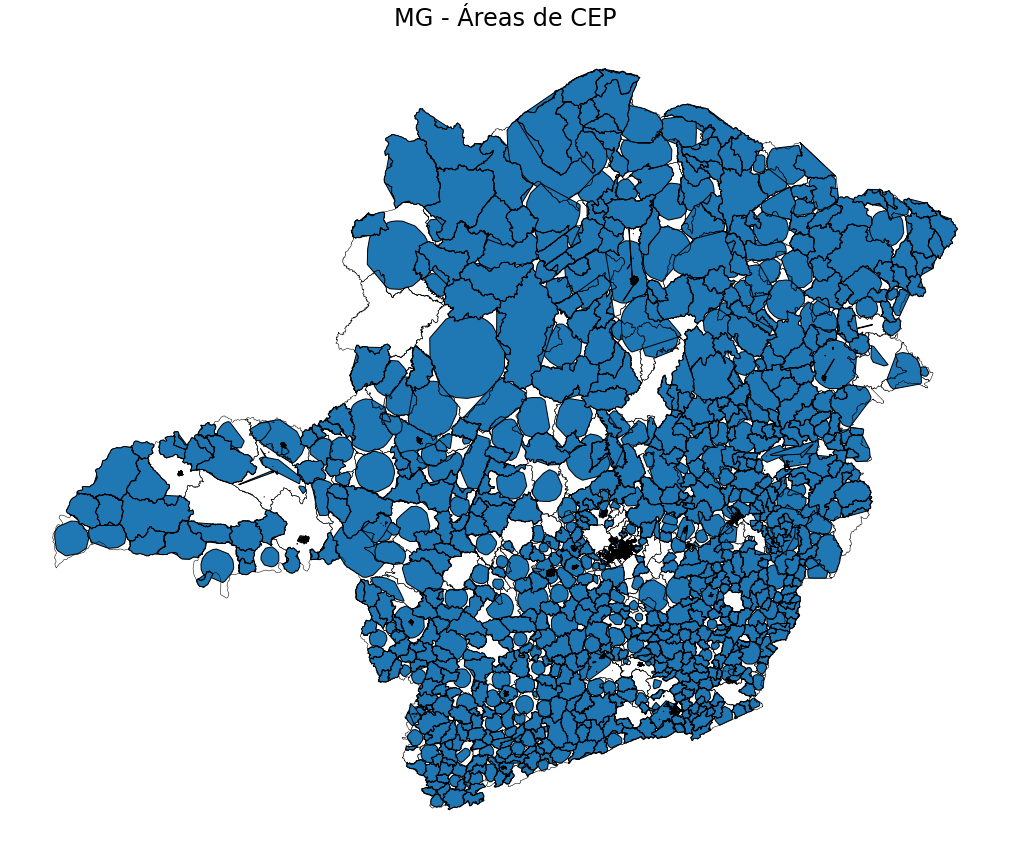

In [5]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("MG - Áreas de CEP", fontsize=24)
lim_municipal.plot(ax=gax,
                   edgecolor='black',
                   linewidth=0.5)
mg_area_cep.plot(ax=gax,
                   edgecolor='black',
                   linewidth=1)
plt.axis('off')
plt.show()